In [9]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [10]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-23-20-55-36']
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [11]:
# crete a dataframe from runs and summary metrics
# async def add_max_to_summary(run):
#     try:
#         history: pd.DataFrame = run.history()
#         # get the row with the highest Self_Play/Mean_Reward
#         metric = "Self_Play/Mean_Reward"
#         best_row = history.loc[history[metric].idxmax()]
#         run.summary[f'max_{metric}'] = best_row[metric]
#         run.summary[f'max_{metric}_step'] = best_row['_step']
#         run.summary.update()
#     except:
#         pass



# async def get_history(run):
#     return await run.history()

# tasks = []
# for run in runs:
#     if run.state != "finished":
#         continue
#     tasks.append(add_max_to_summary(run))

# await asyncio.gather(*tasks)


data = []
for run in tqdm(runs):
    history: pd.DataFrame = run.history()
    for i, row in history.iterrows():
        # add a row to the data with run.config and the history row merged
        data.append({**run.config, **row})

df = pd.DataFrame(data)

df


100%|██████████| 30/30 [00:23<00:00,  1.26it/s]


,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Self_Play/EMA_Discounted_Return,Training/Policy_loss,Evaluation/Mean_Returns,Training/Replay_Buffer_Size,Self_Play/Mean_Return,_timestamp,Evaluation/Mean_Entropy,Training/Value_loss,Self_Play/Min_Timesteps,Evaluation/Mean_Discounted_Returns
0,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-100.000000,1.382405,-100.0,6,-100.000000,1.713914e+09,0.996005,0.999123,100,-100.0
1,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-96.350001,1.380693,NaN,12,-87.833336,1.713915e+09,NaN,0.989088,56,NaN
2,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-95.545000,1.382206,NaN,18,-93.666664,1.713915e+09,NaN,1.002737,62,NaN
3,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-93.331499,1.381881,NaN,24,-88.166664,1.713915e+09,NaN,1.620155,29,NaN
4,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-92.382049,1.382910,NaN,30,-90.166664,1.713915e+09,NaN,10.352190,65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-44.075040,1.201773,-17.0,60,-28.000000,1.713900e+09,0.701727,155.353995,24,-17.0
896,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-48.202528,1.204681,NaN,60,-57.833332,1.713900e+09,NaN,136.210991,33,NaN
897,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-54.141770,1.199370,NaN,60,-68.000000,1.713900e+09,NaN,131.622279,25,NaN
898,12,5,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",0.3,128,...,-48.199238,1.188580,NaN,60,-34.333332,1.713900e+09,NaN,221.641805,21,NaN


In [12]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Self_Play/Total_Mean_Discounted_Return',
       'Evaluation/Timesteps', 'Self_Play/Entropies',
       'Self_Play/Discounted_Return', 'Self_Play/Mean_Timesteps',
       'Evaluation/Entropies', 'Evaluation/Returns', 'Self_Pl

In [13]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [14]:
episode_max = df['episodes'].max()
# if episodes is Nan, set it to episode_max
df['episodes'] = df['episodes'].fillna(episode_max)

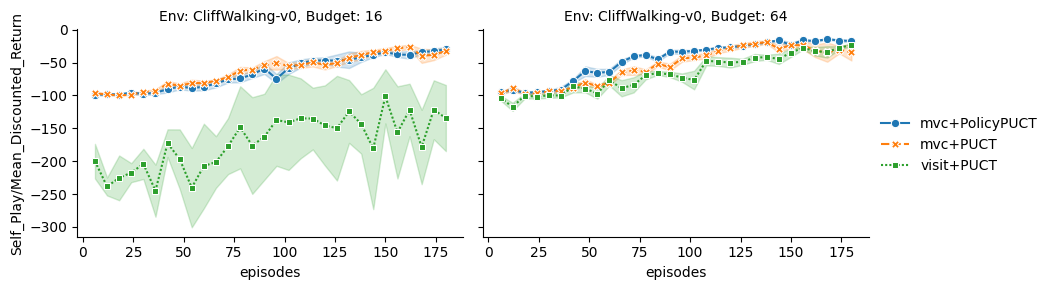

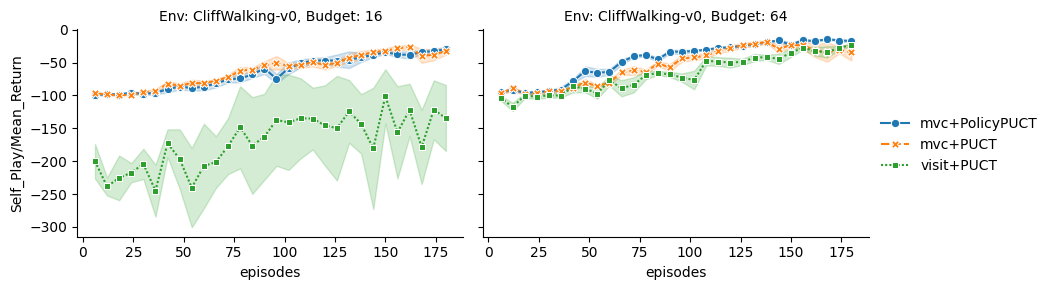

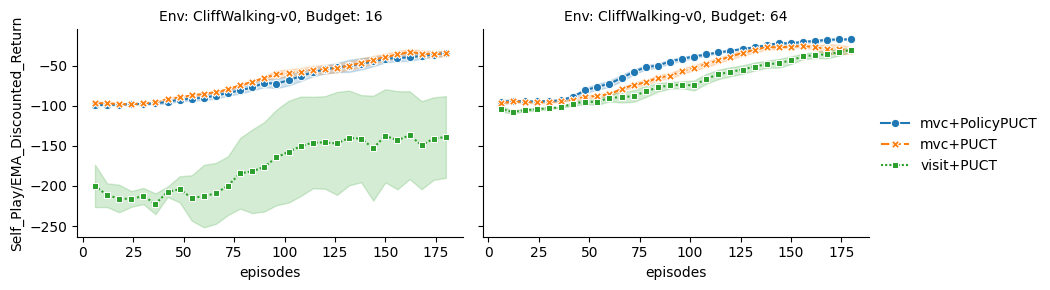

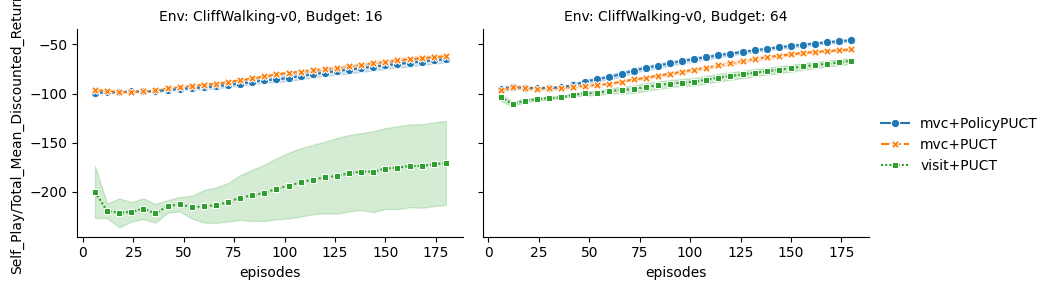

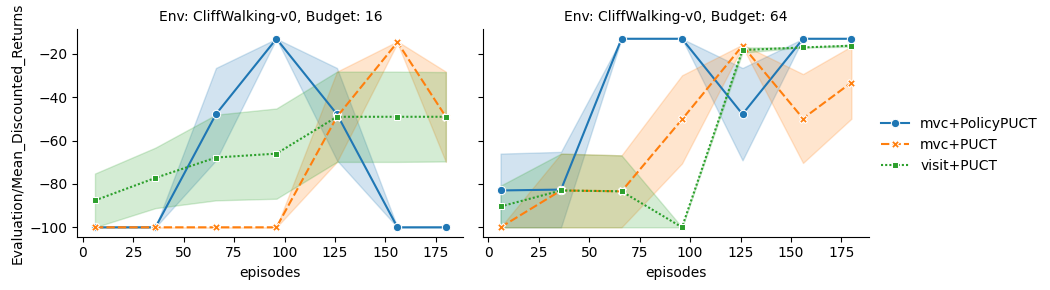

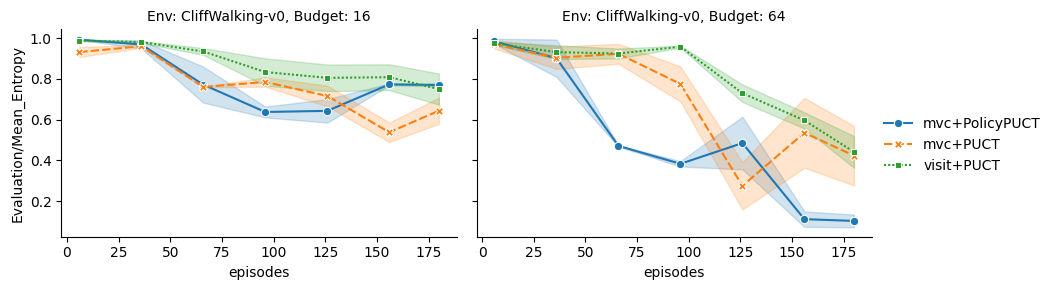

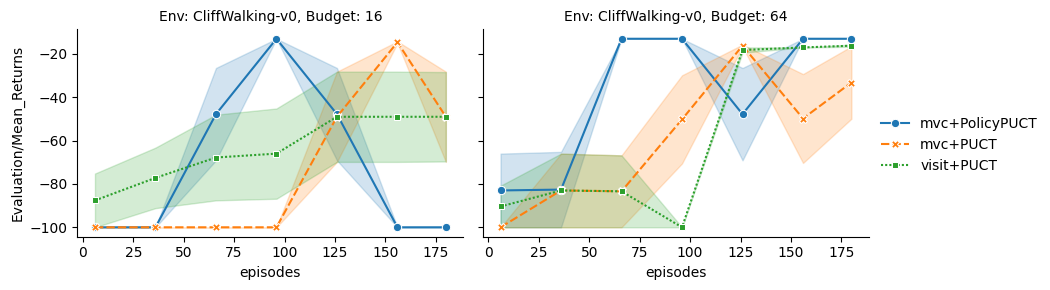

In [15]:





df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]
x_metric = "episodes"

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed


    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("Env: {row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.show()

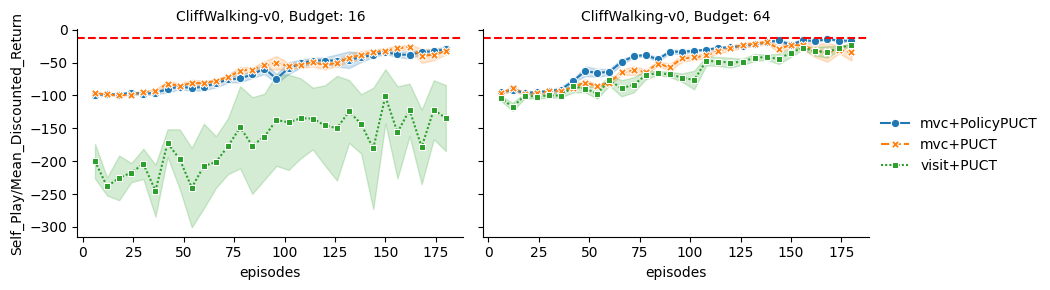

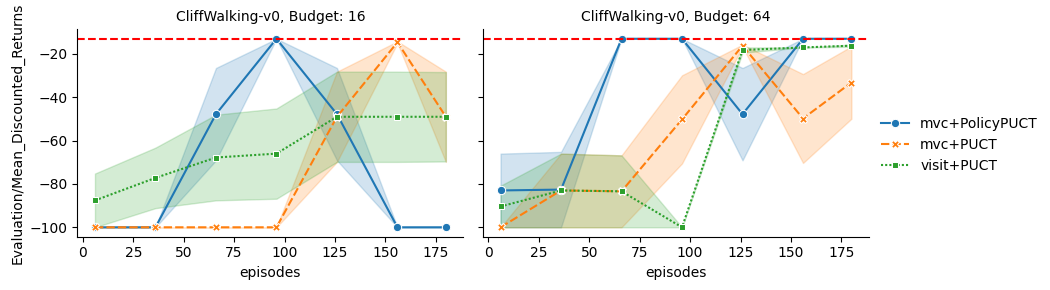

In [16]:

env_description = "CliffWalking-v0"
runs = df[df["env_description"] == env_description]
optimum_value = runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # add a horizontal line for the optimal value to each subplot

    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")



    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("{row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.savefig(f'{save_folder}/{x_metric}_{name_fn(metric).replace(" ", "_")}_{env_description}_{estimator}.pdf')

    plt.show()
